In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold



In [2]:
data = load_wine()

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
X = data.data
y = data.target

In [15]:
def score_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return accuracy_score(y_predict, y_test)

In [19]:
cv = KFold(3, shuffle=True)

In [37]:
def cross_val(X: np.ndarray, y, model, cv_kfold_obj: KFold):
    acc = []
    for train_index, validation_index in cv_kfold_obj.split(X):
        acc.append(score_model(model, X[train_index], y[train_index], X[validation_index], y[validation_index]))
    return sum(acc)/len(acc)

In [38]:
%%time
acc = []
lr = LogisticRegression()
print(cross_val(X, y, lr, cv))

/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.9551789077212806
CPU times: user 537 ms, sys: 4.1 ms, total: 541 ms
Wall time: 1.24 s


/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Mutual Inforamtion

<AxesSubplot: >

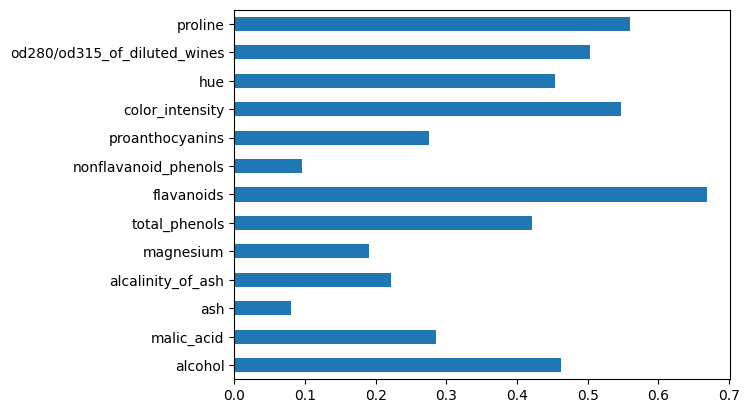

In [21]:
importance = mutual_info_classif(X, y)
importance_series = pd.Series(importance, index=data.feature_names)
importance_series.plot(kind = 'barh')

In [32]:
def remove_based_mu_info(X: pd.DataFrame, y:np.ndarray, threshold: float = 0.2):
    importance = mutual_info_classif(X.values, y)
    importance_series = pd.Series(importance, index=X.columns)
    return X_df.loc[: , importance_series[importance_series > threshold].index]

In [35]:
X_df = pd.DataFrame(X, columns=data.feature_names)
X_df.shape


(178, 13)

In [44]:
X_after_feature_selection_mu_info = remove_based_mu_info(X_df, y, 0.2).values
X_after_feature_selection_mu_info.shape

(178, 10)

In [45]:
print(cross_val(X_after_feature_selection_mu_info, y, lr, cv))

0.9549905838041431


/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

ANOVA

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

In [58]:
feature_selector = SelectKBest(f_classif, k=10)
X_after_feature_selection_anova = feature_selector.fit_transform(X, y)

In [59]:
X_after_feature_selection_anova.shape

(178, 10)

In [60]:
print(cross_val(X_after_feature_selection_anova, y, lr, cv))

0.9549905838041431


/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ashkan/Documents/ML3/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.